In [1]:
# IMPORT
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [72]:
# DATA
df1 = pd.read_csv('data_day.csv')
df2 = pd.read_csv('data_2018-08-05_2021-04-30.csv')
df3 = pd.read_csv('data_2018-05-05_2018-08-04.csv')
df4 = pd.read_csv('data_2015-08-09_2018-05-04.csv')
df5 = pd.read_csv('data_2013-02-12_2015-08-08.csv')
df6 = pd.read_csv('data_2010-05-19_to_2013-02-11.csv')
df7 = pd.read_csv('data_2007-08-23_to_2010-05-18.csv')
df8 = pd.read_csv('data_2004-11-26_to_2007-08-22.csv')
df = pd.concat([df6, df5, df4, df3, df2, df1])
df.index = range(0,4996)
df.tail()

date_time = pd.concat([pd.to_datetime(df['datetime'][0:4000]),pd.to_datetime(df['datetime'][4000:])])

In [73]:
# POP DATA
# try:
#     df.pop('datetime')
# except:
#     print("time popped")
# try:
#     df.pop('name')
# except:
#     print("name popped")
count = 0
for name in df.columns:
    print(f"{name}: {df[name][0]} {type(df[name][0])}")
    if ((not isinstance(df[name][0],(int,float))) or pd.isnull(df[name][0])):
        try:
            df.pop(name)
        except:
            print(f"{name} is popped")
print(count)
df.columns

name: Hanoi <class 'str'>
datetime: 2010-05-19 <class 'str'>
tempmax: 36.5 <class 'numpy.float64'>
tempmin: 26.0 <class 'numpy.float64'>
temp: 30.8 <class 'numpy.float64'>
feelslikemax: 48.1 <class 'numpy.float64'>
feelslikemin: 26.0 <class 'numpy.float64'>
feelslike: 38.4 <class 'numpy.float64'>
dew: 26.3 <class 'numpy.float64'>
humidity: 78.1 <class 'numpy.float64'>
precip: 0.0 <class 'numpy.float64'>
precipprob: 0 <class 'numpy.int64'>
precipcover: 0.0 <class 'numpy.float64'>
preciptype: nan <class 'float'>
snow: nan <class 'numpy.float64'>
snowdepth: nan <class 'numpy.float64'>
windgust: nan <class 'numpy.float64'>
windspeed: 20.5 <class 'numpy.float64'>
winddir: 102.6 <class 'numpy.float64'>
sealevelpressure: 1003.1 <class 'numpy.float64'>
cloudcover: 53.0 <class 'numpy.float64'>
visibility: 11.6 <class 'numpy.float64'>
solarradiation: 301.4 <class 'numpy.float64'>
solarenergy: 26.1 <class 'numpy.float64'>
uvindex: 10 <class 'numpy.int64'>
severerisk: nan <class 'numpy.float64'>
s

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipcover', 'windspeed',
       'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'moonphase'],
      dtype='object')

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

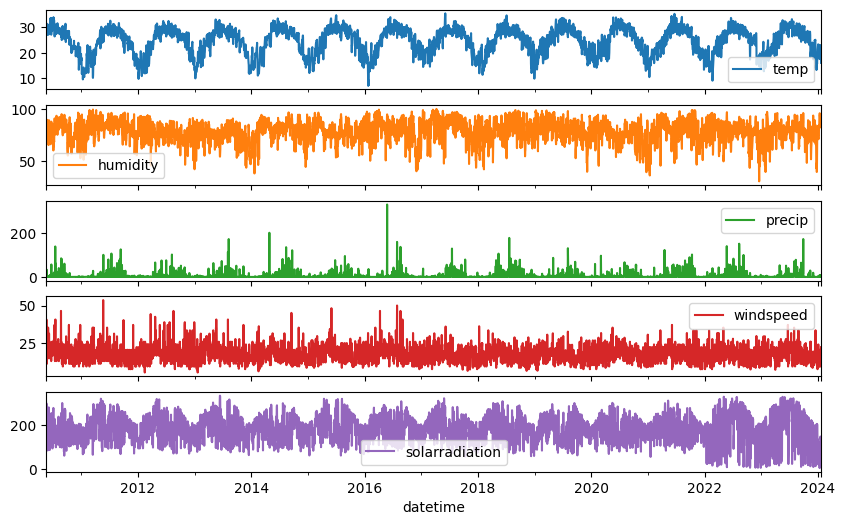

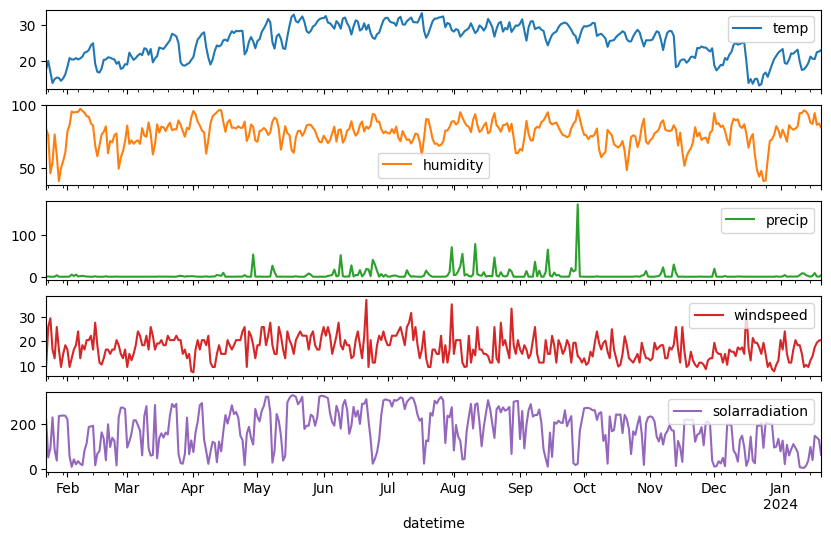

In [74]:
# EVOLUTION OF SOME FEATURES
# plot_cols = ['Temp (degC)', 'Humidity (%)', 'Precipitation (mm)', 'Windspeed (m/s)', 'Solarradiation (kWh/m2)']
plot_cols = ['temp', 'humidity', 'precip', 'windspeed', 'solarradiation']
plot_features = df[plot_cols]

# Change index to date_time
plot_features.index = date_time
plot_features.plot(subplots=True)

plot_features = df[plot_cols][-365:-1]
plot_features.index = date_time[-365:-1]
plot_features.plot(subplots=True)

In [75]:
# STATISTIC OF DATASET
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempmax,4996.0,28.136749,5.986670,8.0,24.000,29.0000,33.00000,41.700
tempmin,4996.0,21.665472,4.999764,3.8,18.000,23.0000,25.90000,31.000
temp,4996.0,24.600941,5.269526,7.0,20.700,25.9000,28.80000,35.500
feelslikemax,4996.0,32.020196,9.546232,8.0,24.000,32.2000,40.60000,52.500
feelslikemin,4996.0,22.322398,6.087809,0.4,18.000,23.0000,25.90000,40.400
feelslike,4996.0,26.918415,7.716734,4.6,20.700,26.5000,33.40000,45.100
dew,4996.0,20.176581,5.843208,-2.1,16.500,22.0000,24.90000,28.400
humidity,4996.0,78.081966,10.465774,31.1,72.200,79.4000,85.32500,100.000
precip,4996.0,4.817242,14.841980,0.0,0.000,0.2165,2.26875,331.243
precipcover,4996.0,8.417058,12.726924,0.0,0.000,4.1700,8.33000,100.000


In [76]:
# TIMESTAMP

# Map values of Series according to an input mapping or function.
# Used for substituting each value in a Series with another value, that may be derived from a function, 
# a dict or a Series.
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s[1] - timestamp_s[0]


86400.0

The time in seconds is not a useful model input. Being weather data, it has clear daily and yearly periodicity. There are many ways you could deal with periodicity.

You can get usable signals by using sine and cosine transforms to clear "Time of day" and "Time of year" signals

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important

Text(0.5, 1.0, 'Time of year signal')

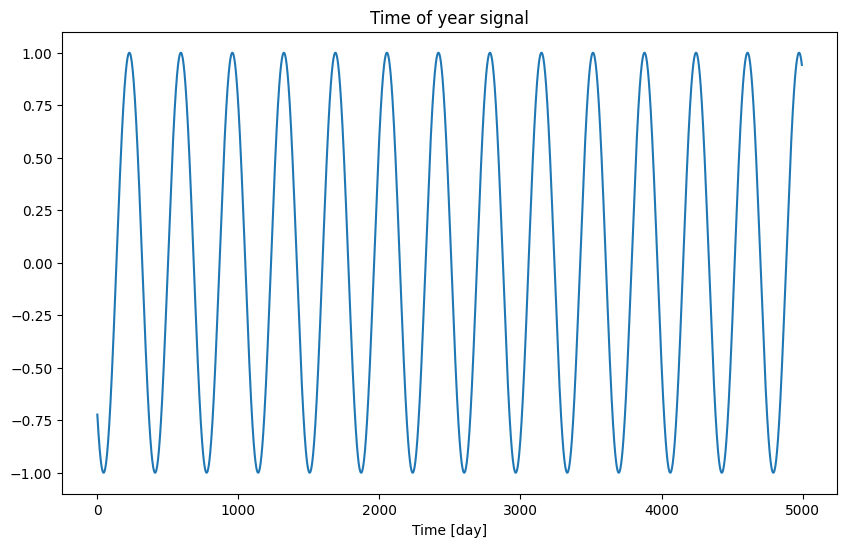

In [77]:
# PERIOD TIME

day = 24*60*60
year = (365.2425)*day
# df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
# df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

# plt.plot(np.array(df['Year sin'])[:366])
plt.plot(np.array(df['Year cos'])[:])
plt.xlabel('Time [day]')
plt.title('Time of year signal')

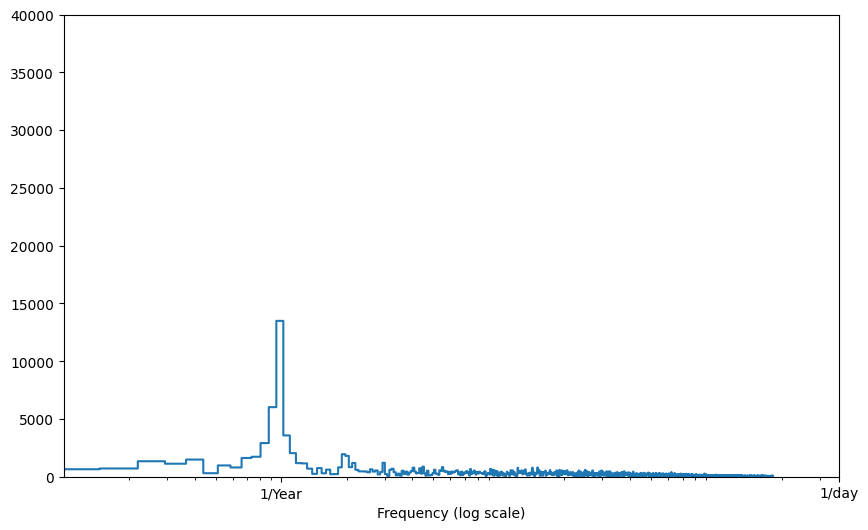

In [78]:
fft = tf.signal.rfft(df['temp'])
f_per_dataset = np.arange(0, len(fft))

n_samples_day = len(df['temp'])
days_per_year = 365.2524
years_per_dataset = n_samples_day/(days_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 40000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [80]:
# LET features be key, value is the index of feature
column_indices = {name: i for i, name in enumerate(df.columns)}
print(column_indices)

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

{'tempmax': 0, 'tempmin': 1, 'temp': 2, 'feelslikemax': 3, 'feelslikemin': 4, 'feelslike': 5, 'dew': 6, 'humidity': 7, 'precip': 8, 'precipcover': 9, 'windspeed': 10, 'winddir': 11, 'sealevelpressure': 12, 'cloudcover': 13, 'visibility': 14, 'solarradiation': 15, 'solarenergy': 16, 'moonphase': 17, 'Year sin': 18, 'Year cos': 19}


In [83]:
# The mean and standard deviation should only be computed using the training data 
# so that the models have no access to the values in the validation and test sets.
train_mean = train_df.mean()
train_std = train_df.std()

def normalize(data):
    data_norm = (data - train_mean)/train_std
    return data_norm


train_df_norm = normalize(train_df)
val_df_norm = normalize(val_df)
test_df_norm = normalize(test_df)

